# MileStone 1

Import Libraries

In [ ]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


Load the Dataset 

In [ ]:
file_path = 'data/primary/Significant_Earthquakes.csv'


df = pd.read_csv(file_path)
print("Dataset loaded successfully!")




C:\Users\prath\AppData\Local\Temp\ipykernel_18484\3936984514.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


âœ… Dataset loaded successfully!


In [5]:
df.columns

Index(['mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt', 'cdi',
       'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids',
       'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type',
       'title', 'longitude', 'latitude'],
      dtype='object')

In [6]:
df.shape

(701401, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701401 entries, 0 to 701400
Data columns (total 28 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   mag        701401 non-null  float64
 1   place      701400 non-null  object 
 2   time       701401 non-null  int64  
 3   updated    701401 non-null  int64  
 4   tz         1447 non-null    float64
 5   url        701401 non-null  object 
 6   detail     701401 non-null  object 
 7   felt       160 non-null     float64
 8   cdi        160 non-null     float64
 9   mmi        3169 non-null    float64
 10  alert      64 non-null      object 
 11  status     701401 non-null  object 
 12  tsunami    701401 non-null  int64  
 13  sig        701401 non-null  int64  
 14  net        701401 non-null  object 
 15  code       701401 non-null  object 
 16  ids        701401 non-null  object 
 17  sources    701401 non-null  object 
 18  types      701401 non-null  object 
 19  nst        487051 non-n

Check for Missing Values 

In [ ]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()


print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
place         1
tz       699954
felt     701241
cdi      701241
mmi      698232
alert    701337
nst      214350
dmin     365159
rms       31218
gap      246668
dtype: int64


Cleaning the Data/Handling Missing Values

Clean and Save the Data 

In [ ]:
import os


columns_to_drop = ['tz', 'felt', 'cdi', 'mmi', 'alert', 'nst', 'dmin', 'rms', 'gap']

# Drop the specified columns
cleaned_df = df.drop(columns=columns_to_drop)

# Drop any remaining rows with missing values
cleaned_df.dropna(inplace=True)

print(f"Data cleaning complete. The cleaned dataset has {cleaned_df.shape[0]} rows.")



output_folder = 'data/processed'


os.makedirs(output_folder, exist_ok=True)

output_file_path = os.path.join(output_folder, 'cleaned_earthquakes.csv')
cleaned_df.to_csv(output_file_path, index=False)

print(f"Cleaned data has been saved successfully to: '{output_file_path}'")

Data cleaning complete. The cleaned dataset has 701400 rows.
âœ… Cleaned data has been saved successfully to: 'data/processed\cleaned_earthquakes.csv'


Load the Cleaned Dataset 

In [ ]:
cleaned_file_path = 'data/processed/cleaned_earthquakes.csv'
df = pd.read_csv(cleaned_file_path)

print("Cleaned dataset loaded successfully!")
df.head()

âœ… Cleaned dataset loaded successfully!


mag                       place          time        updated  \
0  1.22         Northern California  694223586670  1482104002560   
1  1.80  52 km NNE of Chase, Alaska  694223152370  1600111060821   
2  1.30      17km SW of Olancha, CA  694222594190  1454634405050   
3  2.19     19km WSW of Olancha, CA  694222104100  1454629611690   
4  2.70                  Washington  694221171500  1469313677840   

                                                 url  \
0  https://earthquake.usgs.gov/earthquakes/eventp...   
1  https://earthquake.usgs.gov/earthquakes/eventp...   
2  https://earthquake.usgs.gov/earthquakes/eventp...   
3  https://earthquake.usgs.gov/earthquakes/eventp...   
4  https://earthquake.usgs.gov/earthquakes/eventp...   

                                              detail    status  tsunami  sig  \
0  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   23   
1  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   50   
2  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   26   
3  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   74   
4  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0  112   

  net        code             ids sources                              types  \
0  nc     1191656     ,nc1191656,    ,nc,  ,nearby-cities,origin,phase-data,   
1  ak  991gs14ef9  ,ak991gs14ef9,    ,ak,                ,origin,phase-data,   
2  ci     2038416     ,ci2038416,    ,ci,                ,origin,phase-data,   
3  ci     2038415     ,ci2038415,    ,ci,                ,origin,phase-data,   
4  uw    10289958    ,uw10289958,    ,uw,                ,origin,phase-data,   

  magType        type                               title   longitude  \
0      md  earthquake         M 1.2 - Northern California -122.833333   
1      ml  earthquake  M 1.8 - 52 km NNE of Chase, Alaska -149.626800   
2      mh  earthquake      M 1.3 - 17km SW of Olancha, CA -118.158000   
3      mc  earthquake     M 2.2 - 19km WSW of Olancha, CA -118.192000   
4      md   explosion        M 2.7 Explosion - Washington -122.787667   

    latitude  
0  38.824833  
1  62.863800  
2  36.195000  
3  36.200000  
4  46.729000

In [11]:
df.columns

Index(['mag', 'place', 'time', 'updated', 'url', 'detail', 'status', 'tsunami',
       'sig', 'net', 'code', 'ids', 'sources', 'types', 'magType', 'type',
       'title', 'longitude', 'latitude'],
      dtype='object')

Load the Geospatial Data

In [ ]:
import geopandas as gpd

# Load the soil map shapefile
soil_map_path = 'data/soil_data_dsmw/DSMW.shp'
soil_map = gpd.read_file(soil_map_path)

# Convert your earthquake DataFrame into a GeoDataFrame
# We tell GeoPandas that the 'longitude' and 'latitude' columns represent a point
earthquakes_gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude)
)

earthquakes_gdf.set_crs(soil_map.crs, inplace=True)

mag                           place          time        updated  \
0       1.22             Northern California  694223586670  1482104002560   
1       1.80      52 km NNE of Chase, Alaska  694223152370  1600111060821   
2       1.30          17km SW of Olancha, CA  694222594190  1454634405050   
3       2.19         19km WSW of Olancha, CA  694222104100  1454629611690   
4       2.70                      Washington  694221171500  1469313677840   
...      ...                             ...           ...            ...   
701395  4.70  northwest of the Kuril Islands  986086126840  1415322748590   
701396  1.10              Central California  986084714369  1524607951823   
701397  1.42           Hawaii region, Hawaii  986083337800  1585691617430   
701398  1.40                          Nevada  986083323952  1524607951719   
701399  3.90             San Juan, Argentina  986083225920  1415322748037   

                                                      url  \
0       https://earthquake.usgs.gov/earthquakes/eventp...   
1       https://earthquake.usgs.gov/earthquakes/eventp...   
2       https://earthquake.usgs.gov/earthquakes/eventp...   
3       https://earthquake.usgs.gov/earthquakes/eventp...   
4       https://earthquake.usgs.gov/earthquakes/eventp...   
...                                                   ...   
701395  https://earthquake.usgs.gov/earthquakes/eventp...   
701396  https://earthquake.usgs.gov/earthquakes/eventp...   
701397  https://earthquake.usgs.gov/earthquakes/eventp...   
701398  https://earthquake.usgs.gov/earthquakes/eventp...   
701399  https://earthquake.usgs.gov/earthquakes/eventp...   

                                                   detail    status  tsunami  \
0       https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   
1       https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   
2       https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   
3       https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   
4       https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   
...                                                   ...       ...      ...   
701395  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   
701396  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   
701397  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   
701398  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   
701399  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   

        sig net  ...             ids sources  \
0        23  nc  ...     ,nc1191656,    ,nc,   
1        50  ak  ...  ,ak991gs14ef9,    ,ak,   
2        26  ci  ...     ,ci2038416,    ,ci,   
3        74  ci  ...     ,ci2038415,    ,ci,   
4       112  uw  ...    ,uw10289958,    ,uw,   
...     ...  ..  ...             ...     ...   
701395  340  us  ...    ,usp000acbb,    ,us,   
701396   19  nn  ...    ,nn00026937,    ,nn,   
701397   31  hv  ...     ,hv1312131,    ,hv,   
701398   30  nn  ...    ,nn00026936,    ,nn,   
701399  234  us  ...    ,usp000acb9,    ,us,   

                                    types magType        type  \
0       ,nearby-cities,origin,phase-data,      md  earthquake   
1                     ,origin,phase-data,      ml  earthquake   
2                     ,origin,phase-data,      mh  earthquake   
3                     ,origin,phase-data,      mc  earthquake   
4                     ,origin,phase-data,      md   explosion   
...                                   ...     ...         ...   
701395                ,origin,phase-data,      mb  earthquake   
701396                ,origin,phase-data,      ml  earthquake   
701397                ,origin,phase-data,      ml  earthquake   
701398                ,origin,phase-data,      ml  earthquake   
701399                ,origin,phase-data,      md  earthquake   

                                

Perform a Geospatial Join

In [ ]:
# Perform the spatial join using the 'predicate' argument

df_with_soil = gpd.sjoin(earthquakes_gdf, soil_map, how="inner", predicate='within')

# The resulting df_with_soil now has soil data. Let's look at the new columns.
print("Columns after adding soil data:")
print(df_with_soil.columns)


df_with_soil.drop(columns=['index_right', 'geometry'], inplace=True)

# Let's see the first few rows with the new soil info
print("\nData with soil information:")
df_with_soil.head()

Columns after adding soil data:
Index(['mag', 'place', 'time', 'updated', 'url', 'detail', 'status', 'tsunami',
       'sig', 'net', 'code', 'ids', 'sources', 'types', 'magType', 'type',
       'title', 'longitude', 'latitude', 'damage_risk', 'geometry',
       'index_right', 'SNUM', 'FAOSOIL', 'DOMSOI', 'PHASE1', 'PHASE2',
       'MISCLU1', 'MISCLU2', 'PERMAFROST', 'CNTCODE', 'CNTNAME', 'SQKM',
       'COUNTRY'],
      dtype='object')

Data with soil information:


mag                       place          time        updated  \
0  1.22         Northern California  694223586670  1482104002560   
1  1.80  52 km NNE of Chase, Alaska  694223152370  1600111060821   
2  1.30      17km SW of Olancha, CA  694222594190  1454634405050   
3  2.19     19km WSW of Olancha, CA  694222104100  1454629611690   
4  2.70                  Washington  694221171500  1469313677840   

                                                 url  \
0  https://earthquake.usgs.gov/earthquakes/eventp...   
1  https://earthquake.usgs.gov/earthquakes/eventp...   
2  https://earthquake.usgs.gov/earthquakes/eventp...   
3  https://earthquake.usgs.gov/earthquakes/eventp...   
4  https://earthquake.usgs.gov/earthquakes/eventp...   

                                              detail    status  tsunami  sig  \
0  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   23   
1  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   50   
2  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   26   
3  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   74   
4  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0  112   

  net  ... DOMSOI PHASE1 PHASE2 MISCLU1 MISCLU2 PERMAFROST CNTCODE  CNTNAME  \
0  nc  ...     Hh   None   None       0       0          0     231       US   
1  ak  ...     Po   None   None       0       0          2     231       US   
2  ci  ...     Ao     01   None       0       0          0     231       US   
3  ci  ...     Ao     01   None       0       0          0     231       US   
4  uw  ...     Ah   None   None       0       0          0     231       US   

      SQKM                   COUNTRY  
0  12886.0  UNITED STATES OF AMERICA  
1  12095.0  UNITED STATES OF AMERICA  
2  81607.0  UNITED STATES OF AMERICA  
3  81607.0  UNITED STATES OF AMERICA  
4  13737.0  UNITED STATES OF AMERICA  

[5 rows x 32 columns]

In [ ]:
import os

output_folder = 'data/processed'
output_file_path = os.path.join(output_folder, 'earthquakes_with_soil.csv')


df_with_soil.to_csv(output_file_path, index=False)

print(f"Data with soil information saved successfully to: '{output_file_path}'")

âœ… Data with soil information saved successfully to: 'data/processed\earthquakes_with_soil.csv'


In [ ]:
final_data_path = 'data/processed/earthquakes_with_soil.csv'
df = pd.read_csv(final_data_path)

print("âœ… Final dataset with soil info loaded successfully!")
df.head()

âœ… Final dataset with soil info loaded successfully!


mag                       place          time        updated  \
0  1.22         Northern California  694223586670  1482104002560   
1  1.80  52 km NNE of Chase, Alaska  694223152370  1600111060821   
2  1.30      17km SW of Olancha, CA  694222594190  1454634405050   
3  2.19     19km WSW of Olancha, CA  694222104100  1454629611690   
4  2.70                  Washington  694221171500  1469313677840   

                                                 url  \
0  https://earthquake.usgs.gov/earthquakes/eventp...   
1  https://earthquake.usgs.gov/earthquakes/eventp...   
2  https://earthquake.usgs.gov/earthquakes/eventp...   
3  https://earthquake.usgs.gov/earthquakes/eventp...   
4  https://earthquake.usgs.gov/earthquakes/eventp...   

                                              detail    status  tsunami  sig  \
0  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   23   
1  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   50   
2  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   26   
3  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   74   
4  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0  112   

  net  ... DOMSOI PHASE1 PHASE2 MISCLU1 MISCLU2 PERMAFROST CNTCODE  CNTNAME  \
0  nc  ...     Hh    NaN    NaN     0.0     0.0        0.0     231       US   
1  ak  ...     Po    NaN    NaN     0.0     0.0        2.0     231       US   
2  ci  ...     Ao    1.0    NaN     0.0     0.0        0.0     231       US   
3  ci  ...     Ao    1.0    NaN     0.0     0.0        0.0     231       US   
4  uw  ...     Ah    NaN    NaN     0.0     0.0        0.0     231       US   

      SQKM                   COUNTRY  
0  12886.0  UNITED STATES OF AMERICA  
1  12095.0  UNITED STATES OF AMERICA  
2  81607.0  UNITED STATES OF AMERICA  
3  81607.0  UNITED STATES OF AMERICA  
4  13737.0  UNITED STATES OF AMERICA  

[5 rows x 32 columns]

Visualize Earthquake Magnitude Distribution

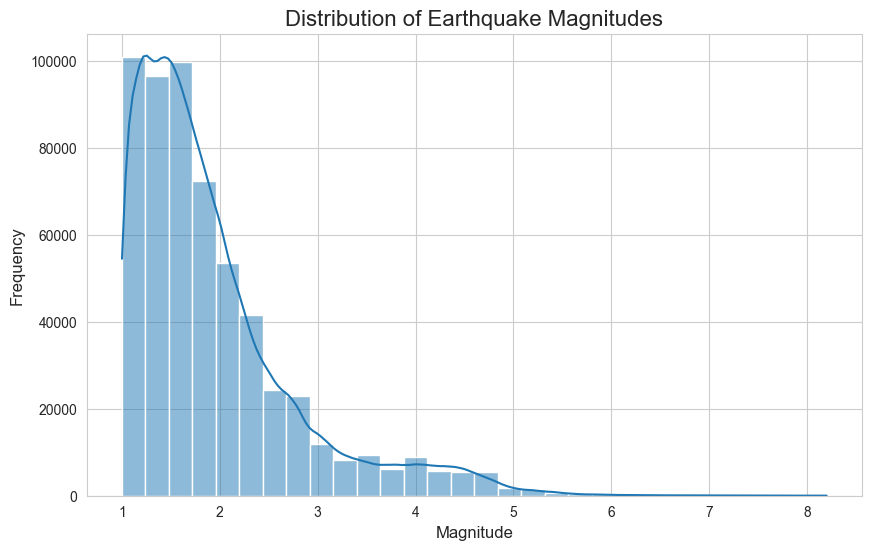

In [30]:
# Create a histogram to visualize the distribution of earthquake magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(df['mag'], kde=True, bins=30)

plt.title('Distribution of Earthquake Magnitudes', fontsize=16)
plt.xlabel('Magnitude', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Visualize Earthquake Locations on a Map

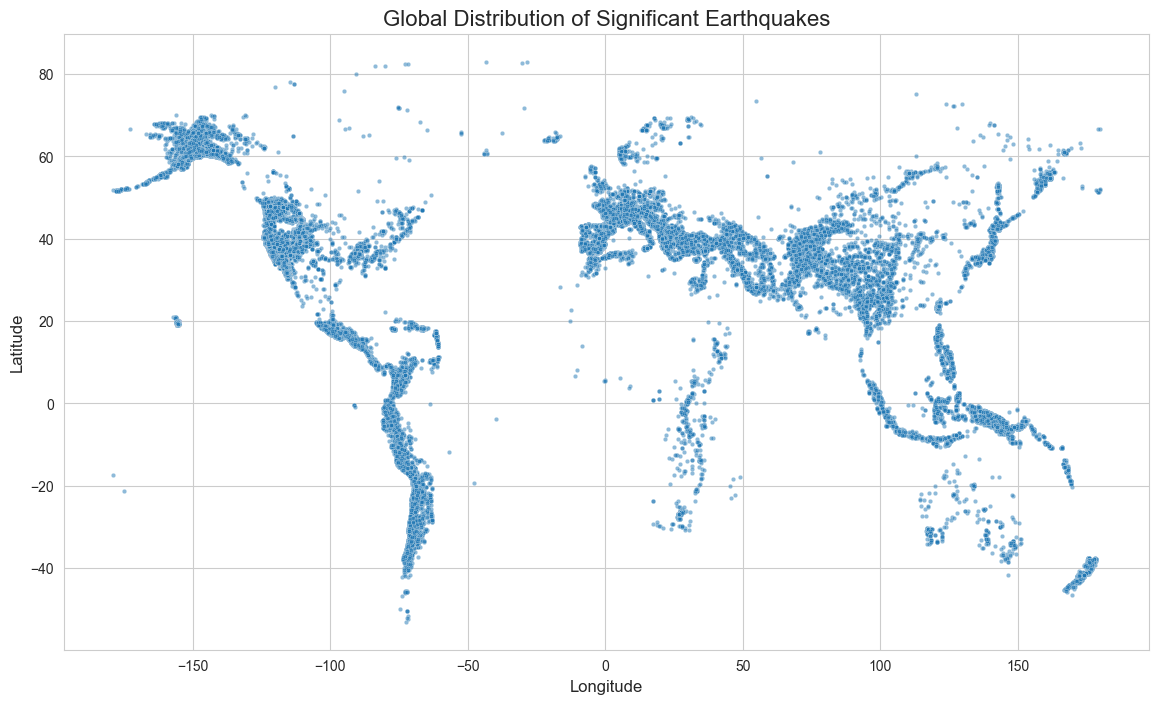

In [29]:
# Create a scatter plot of earthquake locations
plt.figure(figsize=(14, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, s=10, alpha=0.5)

plt.title('Global Distribution of Significant Earthquakes', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()

# Milestone 2: Preprocessing & Feature Engineering.

Define the Target Variable

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('data/processed/earthquakes_with_soil.csv')

df['damage_risk'] = pd.cut(df['sig'],
                           bins=[-1, 499, 749, float('inf')],
                           labels=['Low', 'Medium', 'High'])

print("âœ… Dataset loaded and 'damage_risk' column added.")
df.head()


âœ… Dataset loaded and 'damage_risk' column added.


mag                       place          time        updated  \
0  1.22         Northern California  694223586670  1482104002560   
1  1.80  52 km NNE of Chase, Alaska  694223152370  1600111060821   
2  1.30      17km SW of Olancha, CA  694222594190  1454634405050   
3  2.19     19km WSW of Olancha, CA  694222104100  1454629611690   
4  2.70                  Washington  694221171500  1469313677840   

                                                 url  \
0  https://earthquake.usgs.gov/earthquakes/eventp...   
1  https://earthquake.usgs.gov/earthquakes/eventp...   
2  https://earthquake.usgs.gov/earthquakes/eventp...   
3  https://earthquake.usgs.gov/earthquakes/eventp...   
4  https://earthquake.usgs.gov/earthquakes/eventp...   

                                              detail    status  tsunami  sig  \
0  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   23   
1  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   50   
2  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   26   
3  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0   74   
4  https://earthquake.usgs.gov/fdsnws/event/1/que...  reviewed        0  112   

  net  ... DOMSOI PHASE1 PHASE2 MISCLU1 MISCLU2 PERMAFROST CNTCODE  CNTNAME  \
0  nc  ...     Hh    NaN    NaN     0.0     0.0        0.0     231       US   
1  ak  ...     Po    NaN    NaN     0.0     0.0        2.0     231       US   
2  ci  ...     Ao    1.0    NaN     0.0     0.0        0.0     231       US   
3  ci  ...     Ao    1.0    NaN     0.0     0.0        0.0     231       US   
4  uw  ...     Ah    NaN    NaN     0.0     0.0        0.0     231       US   

      SQKM                   COUNTRY  
0  12886.0  UNITED STATES OF AMERICA  
1  12095.0  UNITED STATES OF AMERICA  
2  81607.0  UNITED STATES OF AMERICA  
3  81607.0  UNITED STATES OF AMERICA  
4  13737.0  UNITED STATES OF AMERICA  

[5 rows x 32 columns]

In [33]:
df.columns

Index(['mag', 'place', 'time', 'updated', 'url', 'detail', 'status', 'tsunami',
       'sig', 'net', 'code', 'ids', 'sources', 'types', 'magType', 'type',
       'title', 'longitude', 'latitude', 'damage_risk', 'SNUM', 'FAOSOIL',
       'DOMSOI', 'PHASE1', 'PHASE2', 'MISCLU1', 'MISCLU2', 'PERMAFROST',
       'CNTCODE', 'CNTNAME', 'SQKM', 'COUNTRY'],
      dtype='object')

Select Features (X) and Target (y)

In [ ]:
# The correct column name for the dominant soil type is 'DOMSOI'
soil_column_name = 'DOMSOI'

# Select our input features and the target variable
features = ['mag', 'latitude', 'longitude', soil_column_name]
target = 'damage_risk'

X = df[features]
y = df[target]

print(f"Successfully selected features using '{soil_column_name}' as the soil column.")
print("\nShape of our features (X):", X.shape)
print("Shape of our target (y):", y.shape)

âœ… Successfully selected features using 'DOMSOI' as the soil column.

Shape of our features (X): (576827, 4)
Shape of our target (y): (576827,)


Split Data into Training and Testing Sets

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 461461
Testing set size: 115366


Define the Preprocessor

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify which columns are numerical and which are categorical
numerical_features = ['mag', 'latitude', 'longitude']
categorical_features = [soil_column_name] # Using 'DOMSOI'


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

print("Preprocessor defined successfully.")

âœ… Preprocessor defined successfully.


Apply the Preprocessor to the Data

In [ ]:
# Fit the preprocessor on the training data and transform it
X_train_processed = preprocessor.fit_transform(X_train)

# Use the same fitted preprocessor to transform the test data
X_test_processed = preprocessor.transform(X_test)

print("Preprocessing complete!")
print("Shape of processed training data:", X_train_processed.shape)
print("Shape of processed testing data:", X_test_processed.shape)

âœ… Preprocessing complete!
Shape of processed training data: (461461, 114)
Shape of processed testing data: (115366, 114)


Train a Baseline Model (Logistic Regression) ðŸ§ 

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the processed training data
log_reg_model.fit(X_train_processed, y_train)

print("Baseline Logistic Regression model trained successfully on the enriched data!")

âœ… Baseline Logistic Regression model trained successfully on the enriched data!


Evaluate the Baseline Model ðŸ“ˆ

Accuracy of the baseline model: 1.00

Classification Report:


c:\Users\prath\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\prath\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\prath\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

              precision    recall  f1-score   support

        High       0.00      0.00      0.00        14
         Low       1.00      1.00      1.00    115207
      Medium       0.91      0.81      0.85       145

    accuracy                           1.00    115366
   macro avg       0.64      0.60      0.62    115366
weighted avg       1.00      1.00      1.00    115366

Confusion Matrix:


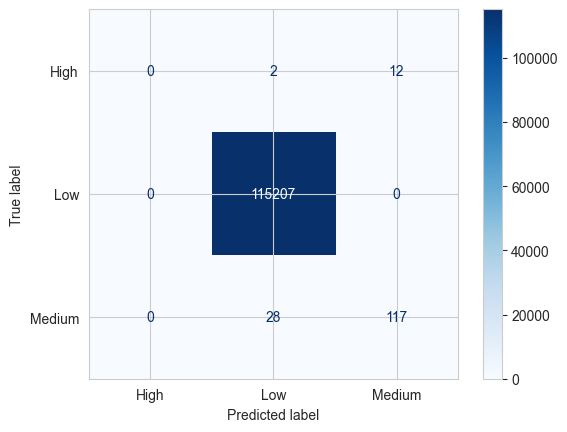

In [40]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Make predictions on the processed test data
y_pred_lr = log_reg_model.predict(X_test_processed)

# Calculate the accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of the baseline model: {accuracy_lr:.2f}\n")

# Print the detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Visualize the results with a Confusion Matrix
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(log_reg_model, X_test_processed, y_test, cmap='Blues')
plt.show()

 Train an Advanced Model (Random Forest) ðŸŒ³

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the same processed training data
rf_model.fit(X_train_processed, y_train)

print("Advanced Random Forest model trained successfully!")

âœ… Advanced Random Forest model trained successfully!


Accuracy of the Random Forest model: 1.00

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.71      0.83        14
         Low       1.00      1.00      1.00    115207
      Medium       0.99      0.96      0.97       145

    accuracy                           1.00    115366
   macro avg       1.00      0.89      0.94    115366
weighted avg       1.00      1.00      1.00    115366

Confusion Matrix:


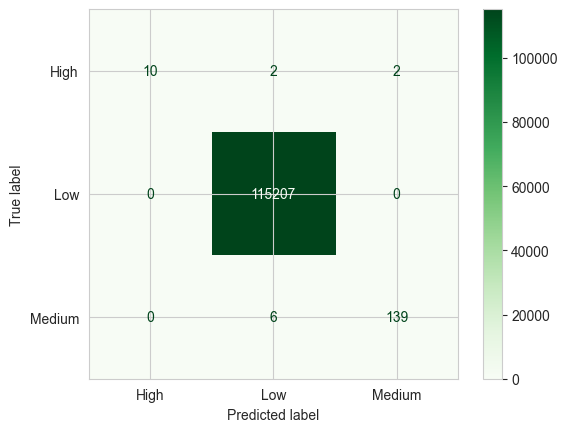

In [42]:
# Make predictions on the processed test data
y_pred_rf = rf_model.predict(X_test_processed)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the Random Forest model: {accuracy_rf:.2f}\n")

# Print the detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Visualize the results with a Confusion Matrix
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_processed, y_test, cmap='Greens')
plt.show()

 # Milestone 3: Evaluation & Explainability

Extract and View Feature Importances

In [ ]:
# Extract feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(feature_names)

# Create a simple pandas Series to view the importances with their names
importance_series = pd.Series(importances, index=all_feature_names)

# Sort the features by importance
sorted_importances = importance_series.sort_values(ascending=False)

print("Feature Importances (from most to least important):")
print(sorted_importances)

Feature Importances (from most to least important):
mag          0.899359
longitude    0.045502
latitude     0.041657
DOMSOI_Yl    0.000667
DOMSOI_Hh    0.000595
               ...   
DOMSOI_Ck    0.000000
DOMSOI_RK    0.000000
DOMSOI_Pp    0.000000
DOMSOI_V     0.000000
DOMSOI_Zt    0.000000
Length: 114, dtype: float64


Visualize Feature Importances ðŸ“Š

C:\Users\prath\AppData\Local\Temp\ipykernel_18484\1039078434.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(groups.values()), y=list(groups.keys()), palette='plasma')


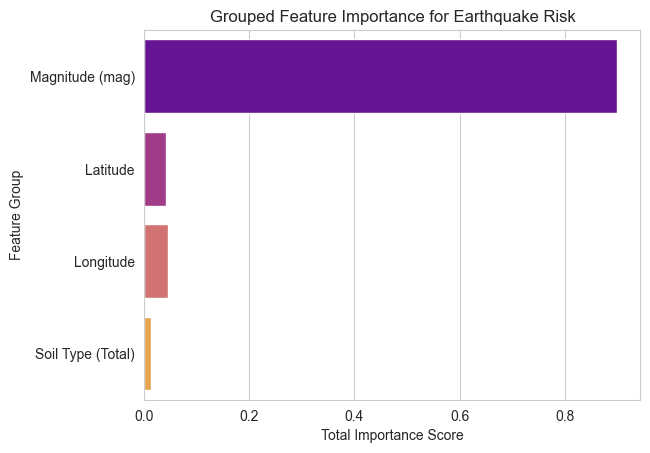

In [46]:
importances = rf_model.feature_importances_
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = list(numerical_features) + list(feature_names)

# Group importances
groups = {'Magnitude (mag)': 0, 'Latitude': 0, 'Longitude': 0, 'Soil Type (Total)': 0}

for name, imp in zip(all_features, importances):
    if 'mag' in name: groups['Magnitude (mag)'] += imp
    elif 'latitude' in name: groups['Latitude'] += imp
    elif 'longitude' in name: groups['Longitude'] += imp
    elif soil_column_name in name: groups['Soil Type (Total)'] += imp

# Plot
sns.barplot(x=list(groups.values()), y=list(groups.keys()), palette='plasma')
plt.title('Grouped Feature Importance for Earthquake Risk')
plt.xlabel('Total Importance Score')
plt.ylabel('Feature Group')
plt.show()

Save Your Model and Preprocessor

In [ ]:
import joblib

# Save the preprocessor object
joblib.dump(preprocessor, 'models/preprocessor.joblib')

# Save the trained Random Forest model
joblib.dump(rf_model, 'models/random_forest_model.joblib')

# We also need the list of unique soil types for the dropdown menu in the app
soil_types = df[soil_column_name].unique().tolist()
joblib.dump(soil_types, 'models/soil_types.joblib')

print("Model, preprocessor, and soil types list saved successfully in the 'models' folder!")

âœ… Model, preprocessor, and soil types list saved successfully in the 'models' folder!
